In [45]:
import pyvisa as visa
import matplotlib.pyplot as plt 
import numpy as np 
import time    
import pandas as pd

def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print( "Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print( "Toc: start time not set")
tic()
memdepth = 6000000  

rm = visa.ResourceManager() 
#inst=rm.list_resources()[1]
rigol_scope=rm.open_resource('USB0::0x1AB1::0x04CE::DS1ZC230600493::INSTR') 


# rigol_scope.write(":TIMebase:SCALe 100.0E-3")  
rigol_scope.write(":STOP") 
rigol_scope.write(":WAVeform:SOURce CHANnel1")  
rigol_scope.write(":WAV:MODE RAW")  
rigol_scope.write(":ACQuire:MDEPth %d" %memdepth)
rigol_scope.write(":WAVeform:FORMat ASCII") 
rigol_scope.write(":WAVeform:STAR 1") 
# rigol_scope.write(":WAVeform:STOP %d" %memdepth)
rigol_scope.write(":WAVeform:STOP 60000")
#rigol_scope.write(":WAVeform:POINts 1200")  
xincr = float(rigol_scope.query("WAVeform:XINCrement?")) # x-axis least count  
  
data = rigol_scope.query("WAV:DATA?")

  
data_string = data.split(",")  
#delete the first string of voltage data
del data_string[0]  
    
df = pd.DataFrame(data_string) 
df.to_csv('E:/LIAD_DATA_PON/time_delay_channel11_csv.csv') 
rigol_scope.write(":RUN") 
toc()
#print(data_string)
# stop = xincr *(len(data_string))  
# time = np.arange(0,stop, xincr)   
# plt.figure(figsize=(20,20 ))
# plt.plot(time,data_string,"ro")  
# plt.show() 
# plt.plot(time,data_string)

Elapsed time is 1.004296064376831 seconds.


In [43]:
print(rigol_scope.query(":WAVeform:STAR?"))
print(rigol_scope.query(":WAVeform:STOP?"))
print(rigol_scope.query(":ACQuire:MDEPth?"))
print(rigol_scope.query(":WAV:MODE?"))
print(rigol_scope.query("TIMebase:MAIN:SCALe?")) 
print(rigol_scope.query("WAVeform:XINCrement?"))

1

60000

6000000

RAW

1.0000000e-01

2.000000e-07



Elapsed time is 1.51625394821167 seconds.

Elapsed time is 0.33226561546325684 seconds.

In [ ]:
# สำหรับ check timing ใช้ 1 channel เพื่อต่อ T ทีสัญญาณที่ผสมระหว่าง output กับ input ที่เข้า femtobuck 
# ใช้ 1 ckannel เพื่อต่อเข้า photo diode

In [18]:
A=['4.104008e-01', '4.428008e-01', '3.996008e-01', '3.996008e-01', '4.428008e-01', '4.428008e-01', '3.996008e-01', '3.996008e-01', '4.428008e-01', '4.320008e-01', '3.996008e-01', '4.320008e-01', '3.888008e-01', '3.888008e-01', '4.320008e-01', '4.212008e-01', '3.888008e-01', '4.212008e-01', '3.780008e-01', '4.212008e-01', '3.780008e-01', '3.780008e-01', '4.212008e-01', '4.212008e-01', '3.672008e-01', '4.104008e-01', '3.564008e-01', '4.104008e-01', '3.564008e-01', '3.564008e-01', '3.996008e-01', '3.996008e-01', '3.456008e-01', '3.996008e-01', '3.456008e-01', '3.996008e-01', '3.456008e-01', '3.348008e-01', '3.888008e-01', '3.780008e-01', '3.348008e-01', '3.672008e-01', '3.348008e-01', '3.348008e-01', '3.672008e-01', '3.672008e-01', '3.240008e-01', '3.240008e-01', '3.672008e-01', '3.564008e-01', '3.132008e-01', '3.564008e-01', '3.024008e-01', '3.456008e-01', '3.024008e-01', '3.456008e-01', '3.024008e-01', '3.348008e-01', '3.024008e-01', '3.348008e-01', '2.916008e-01', '3.348008e-01', '2.808008e-01', '3.240008e-01', '2.808008e-01', '3.132008e-01', '2.700008e-01', '3.132008e-01', '2.700008e-01', '3.132008e-01', '2.592008e-01', '3.024008e-01', '2.484008e-01', '2.916008e-01', '2.484008e-01', '2.808008e-01', '2.376008e-01', '2.376008e-01', '2.808008e-01', '2.700008e-01', '2.268008e-01', '2.592008e-01', '2.160008e-01', '2.592008e-01', '2.160008e-01', '2.052007e-01', '2.592008e-01', '2.052007e-01', '2.484008e-01', '2.484008e-01', '1.836007e-01', '2.268008e-01', '1.728007e-01', '2.268008e-01', '1.728007e-01', '2.268008e-01', '1.620007e-01', '2.160008e-01', '1.620007e-01', '1.944007e-01', '1.512007e-01', '1.944007e-01', '1.404007e-01', '1.836007e-01', '1.296007e-01', '1.728007e-01', '1.296007e-01', '1.620007e-01', '1.188007e-01', '1.188007e-01', '1.512007e-01', '1.512007e-01', '1.080007e-01', '1.080007e-01', '1.404007e-01', '1.404007e-01', '7.560070e-02', '7.560070e-02', '1.296007e-01', '1.080007e-01', '6.480069e-02', '9.720071e-02', '5.400069e-02', '8.640070e-02', '4.320069e-02', '8.640070e-02', '3.240069e-02', '7.560070e-02', '2.160069e-02', '2.160069e-02', '6.480069e-02', '5.400069e-02', '6.929040e-07', '4.320069e-02', '-1.079931e-02', '-1.079931e-02', '3.240069e-02', '2.160069e-02', '-2.159931e-02', '1.080069e-02', '-3.239931e-02', '6.929040e-07', '-4.319931e-02', '6.929040e-07', '-5.399931e-02', '-5.399931e-02', '-1.079931e-02', '-2.159931e-02', '-6.479931e-02', '-2.159931e-02', '-6.479931e-02', '-4.319931e-02', '-8.639932e-02', '-8.639932e-02', '-4.319931e-02', '-4.319931e-02', '-9.719932e-02', '-4.319931e-02', '-9.719932e-02', '-9.719932e-02', '-4.319931e-02', '-9.719932e-02', '-4.319931e-02', '-8.639932e-02', '-3.239931e-02', '-6.479931e-02', '6.929040e-07', '-3.239931e-02', '4.320069e-02', '2.160069e-02', '9.720071e-02', '6.480069e-02', '1.512007e-01', '1.080007e-01', '1.620007e-01', '1.620007e-01', '1.080007e-01', '1.404007e-01', '5.400069e-02', '8.640070e-02', '6.929040e-07', '2.160069e-02', '-5.399931e-02', '-1.079931e-02', '-9.719932e-02', '-5.399931e-02', '-1.295993e-01', '-9.719932e-02', '-1.511993e-01', '-1.187993e-01', '-1.727993e-01', '-1.295993e-01', '-1.943994e-01', '-1.619993e-01', '-2.051994e-01', '-2.051994e-01', '-1.619993e-01', '-1.943994e-01', '-1.403993e-01', '-1.727993e-01', '-1.079993e-01', '-1.403993e-01', '-6.479931e-02', '-9.719932e-02', '6.929040e-07', '-3.239931e-02', '6.480069e-02', '4.320069e-02', '1.404007e-01', '1.080007e-01', '1.620007e-01', '1.620007e-01', '1.080007e-01', '1.296007e-01', '4.320069e-02', '6.480069e-02', '-3.239931e-02', '6.929040e-07', '-9.719932e-02', '-7.559931e-02', '-1.727993e-01', '-1.295993e-01', '-2.375994e-01', '-2.051994e-01', '-2.807994e-01', '-2.483994e-01', '-3.347994e-01', '-2.915994e-01', '-3.779994e-01', '-3.455994e-01', '-3.995994e-01', '-3.671994e-01', '-4.211994e-01', '-3.887994e-01', '-4.535995e-01', '-4.103994e-01', '-4.751995e-01', '-4.427994e-01', '-4.859995e-01', '-4.535995e-01', '-4.967995e-01', '-4.643995e-01', '-5.183995e-01', '-4.751995e-01', '-5.399995e-01', '-4.859995e-01', '-5.399995e-01', '-4.967995e-01', '-5.615995e-01', '-5.183995e-01', '-5.615995e-01', '-5.183995e-01', '-5.723995e-01', '-5.291995e-01', '-5.723995e-01', '-5.291995e-01', '-5.831995e-01', '-5.399995e-01', '-5.831995e-01', '-5.399995e-01', '-5.831995e-01', '-5.831995e-01', '-5.399995e-01', '-5.831995e-01', '-5.399995e-01', '-5.831995e-01', '-5.291995e-01', '-5.723995e-01', '-5.291995e-01', '-5.615995e-01', '-5.075995e-01', '-5.507995e-01', '-4.967995e-01', '-5.507995e-01', '-4.967995e-01', '-5.075995e-01', '-5.615995e-01', '-5.291995e-01', '-5.723995e-01', '-5.723995e-01', '-5.291995e-01', '-5.831995e-01', '-5.291995e-01', '-5.831995e-01', '-5.399995e-01', '-5.507995e-01', '-5.831995e-01', '-5.831995e-01', '-5.399995e-01', '-5.831995e-01', '-5.399995e-01', '-5.399995e-01', '-5.831995e-01', '-5.831995e-01', '-5.399995e-01', '-5.831995e-01', '-5.291995e-01', '-5.723995e-01', '-5.291995e-01', '-5.723995e-01', '-5.291995e-01', '-5.291995e-01', '-5.615995e-01', '-5.615995e-01', '-5.183995e-01', '-5.615995e-01', '-5.183995e-01', '-5.507995e-01', '-5.075995e-01', '-5.507995e-01', '-4.967995e-01', '-4.967995e-01', '-5.399995e-01', '-5.399995e-01', '-4.859995e-01', '-5.183995e-01', '-4.751995e-01', '-5.183995e-01', '-4.643995e-01', '-4.643995e-01', '-5.075995e-01', '-4.967995e-01', '-4.535995e-01', '-4.967995e-01', '-4.427994e-01', '-4.427994e-01', '-4.859995e-01', '-4.751995e-01', '-4.319994e-01', '-4.643995e-01', '-4.211994e-01', '-4.643995e-01', '-4.103994e-01', '-3.995994e-01', '-4.535995e-01', '-4.427994e-01', '-3.887994e-01', '-4.211994e-01', '-3.779994e-01', '-4.211994e-01', '-3.671994e-01', '-3.995994e-01', '-3.563994e-01', '-3.563994e-01', '-3.995994e-01', '-3.887994e-01', '-3.455994e-01', '-3.779994e-01', '-3.347994e-01', '-3.671994e-01', '-3.239994e-01', '-3.671994e-01', '-3.131994e-01', '-3.023994e-01', '-3.455994e-01', '-3.347994e-01', '-2.807994e-01', '-3.239994e-01', '-2.807994e-01', '-3.131994e-01', '-2.699994e-01', '-3.023994e-01', '-2.591994e-01', '-2.915994e-01', '-2.483994e-01', '-2.807994e-01', '-2.375994e-01', '-2.699994e-01', '-2.159994e-01', '-2.591994e-01', '-2.051994e-01', '-2.051994e-01', '-2.483994e-01', '-1.943994e-01', '-2.375994e-01', '-2.267994e-01', '-1.727993e-01', '-2.159994e-01', '-1.619993e-01', '-2.051994e-01', '-1.511993e-01', '-1.943994e-01', '-1.295993e-01', '-1.727993e-01', '-1.295993e-01', '-1.727993e-01', '-1.187993e-01', '-1.511993e-01', '-1.079993e-01', '-1.403993e-01', '-9.719932e-02', '-1.295993e-01', '-8.639932e-02', '-1.187993e-01', '-7.559931e-02', '-1.079993e-01', '-6.479931e-02', '-9.719932e-02', '-4.319931e-02', '-8.639932e-02', '-3.239931e-02', '-6.479931e-02', '-2.159931e-02', '-2.159931e-02', '-6.479931e-02', '-5.399931e-02', '6.929040e-07', '-4.319931e-02', '1.080069e-02', '-3.239931e-02', '3.240069e-02', '-1.079931e-02', '3.240069e-02', '-1.079931e-02', '4.320069e-02', '1.080069e-02', '5.400069e-02', '2.160069e-02', '6.480069e-02', '2.160069e-02', '7.560070e-02', '3.240069e-02', '8.640070e-02', '4.320069e-02', '8.640070e-02', '5.400069e-02', '9.720071e-02', '6.480069e-02', '1.080007e-01', '6.480069e-02', '1.188007e-01', '8.640070e-02', '1.296007e-01', '9.720071e-02', '1.404007e-01', '1.080007e-01', '1.512007e-01', '1.512007e-01', '1.080007e-01', '1.188007e-01', '1.620007e-01', '1.296007e-01', '1.728007e-01', '1.296007e-01', '1.836007e-01', '1.404007e-01', '1.836007e-01', '1.512007e-01', '1.944007e-01', '1.944007e-01', '1.620007e-01', '1.620007e-01', '2.160008e-01', '1.620007e-01', '2.160008e-01', '2.268008e-01', '1.728007e-01', '2.268008e-01', '1.836007e-01', '1.836007e-01', '2.376008e-01', '1.944007e-01', '2.376008e-01', '2.052007e-01', '2.484008e-01', '2.484008e-01', '2.052007e-01', '2.160008e-01', '2.592008e-01', '2.160008e-01', '2.592008e-01', '2.592008e-01', '2.160008e-01', '2.268008e-01', '2.592008e-01', '2.268008e-01', '2.700008e-01', '2.376008e-01', '2.700008e-01', '2.376008e-01', '2.808008e-01', '2.376008e-01', '2.808008e-01', '2.484008e-01', '2.808008e-01', '2.808008e-01', '2.484008e-01', '2.484008e-01', '2.916008e-01', '2.808008e-01', '2.484008e-01', '2.484008e-01', '2.916008e-01', '2.484008e-01', '3.024008e-01', '2.484008e-01', '3.024008e-01', '2.916008e-01', '2.484008e-01', '2.484008e-01', '2.916008e-01', '2.916008e-01', '2.484008e-01', '2.484008e-01', '3.024008e-01', '3.024008e-01', '2.484008e-01', '2.484008e-01', '3.024008e-01', '2.484008e-01', '3.024008e-01', '2.484008e-01', '3.024008e-01', '2.484008e-01', '2.916008e-01', '2.916008e-01', '2.484008e-01', '2.484008e-01', '2.808008e-01', '2.484008e-01', '2.808008e-01', '2.808008e-01', '2.376008e-01', '2.808008e-01', '2.376008e-01', '2.376008e-01', '2.808008e-01', '2.376008e-01', '2.808008e-01', '2.700008e-01', '2.376008e-01', '2.268008e-01', '2.700008e-01', '2.592008e-01', '2.160008e-01', '2.160008e-01', '2.592008e-01', '2.160008e-01', '2.592008e-01', '2.484008e-01', '2.052007e-01', '2.484008e-01', '2.052007e-01', '2.376008e-01', '1.944007e-01', '2.376008e-01', '1.836007e-01', '2.268008e-01', '1.836007e-01', '2.268008e-01', '1.728007e-01', '2.160008e-01', '1.620007e-01', '1.620007e-01', '1.944007e-01', '1.944007e-01', '1.512007e-01', '1.836007e-01', '1.404007e-01', '1.728007e-01', '1.296007e-01', '1.728007e-01', '1.296007e-01', '1.620007e-01', '1.080007e-01', '1.512007e-01', '1.080007e-01', '1.404007e-01', '8.640070e-02', '1.404007e-01', '7.560070e-02', '1.188007e-01', '7.560070e-02', '1.080007e-01', '6.480069e-02', '9.720071e-02', '4.320069e-02', '8.640070e-02', '3.240069e-02', '3.240069e-02', '7.560070e-02', '6.480069e-02', '2.160069e-02', '4.320069e-02', '6.929040e-07', '3.240069e-02', '-2.159931e-02', '2.160069e-02', '-3.239931e-02', '6.929040e-07', '-4.319931e-02', '6.929040e-07', '-5.399931e-02', '-2.159931e-02', '-6.479931e-02', '-3.239931e-02', '-8.639932e-02', '-9.719932e-02', '-4.319931e-02', '-6.479931e-02', '-1.187993e-01', '-8.639932e-02', '-1.403993e-01', '-1.079993e-01', '-1.511993e-01', '-1.187993e-01', '-1.727993e-01', '-1.295993e-01', '-1.835994e-01', '-1.511993e-01', '-2.051994e-01', '-1.727993e-01', '-2.159994e-01', '-1.835994e-01', '-2.375994e-01', '-1.943994e-01', '-2.483994e-01', '-2.159994e-01', '-2.807994e-01', '-2.483994e-01', '-2.915994e-01', '-2.591994e-01', '-3.023994e-01', '-2.699994e-01', '-3.239994e-01', '-2.915994e-01', '-3.347994e-01', '-3.131994e-01', '-3.671994e-01', '-3.347994e-01', '-3.887994e-01', '-3.563994e-01', '-4.103994e-01', '-3.671994e-01', '-4.211994e-01', '-3.887994e-01', '-4.535995e-01', '-4.103994e-01', '-4.751995e-01', '-4.319994e-01', '-4.859995e-01', '-4.643995e-01', '-5.075995e-01', '-4.751995e-01', '-5.183995e-01', '-4.859995e-01', '-5.399995e-01', '-5.183995e-01', '-5.723995e-01', '-5.291995e-01', '-5.831995e-01', '-5.507995e-01', '-6.047995e-01', '-5.723995e-01', '-6.263995e-01', '-5.831995e-01', '-6.479995e-01', '-6.155995e-01', '-6.587995e-01', '-6.263995e-01', '-6.803995e-01', '-6.479995e-01', '-7.127995e-01', '-6.695995e-01', '-7.235996e-01', '-6.911995e-01', '-7.451996e-01', '-7.127995e-01', '-7.667996e-01', '-7.235996e-01', '-7.775996e-01', '-7.451996e-01', '-7.991996e-01', '-7.559996e-01', '-8.207996e-01', '-7.883996e-01', '-8.315996e-01', '-7.883996e-01', '-8.423996e-01', '-8.099996e-01', '-8.639996e-01', '-8.315996e-01', '-8.855996e-01', '-8.963996e-01', '-8.423996e-01', '-8.639996e-01', '-9.071996e-01', '-8.855996e-01', '-9.287996e-01', '-8.963996e-01', '-9.395996e-01', '-9.071996e-01', '-9.503996e-01', '-9.179996e-01', '-9.719996e-01', '-9.287996e-01', '-9.827996e-01', '-9.395996e-01', '-9.935997e-01', '-9.611996e-01', '-1.004400e+00', '-9.719996e-01', '-1.015200e+00', '-9.827996e-01', '-1.026000e+00', '-9.827996e-01', '-1.026000e+00', '-9.935997e-01', '-1.036800e+00', '-1.004400e+00', '-1.047600e+00', '-1.004400e+00', '-1.047600e+00', '-1.047600e+00', '-1.004400e+00', '-1.047600e+00', '-1.004400e+00', '-1.047600e+00', '-1.004400e+00', '-1.036800e+00', '-9.827996e-01', '-1.026000e+00', '-9.719996e-01', '-1.004400e+00', '-9.287996e-01', '-9.611996e-01', '-8.747996e-01', '-9.071996e-01', '-7.667996e-01', '-7.991996e-01', '-6.263995e-01', '-6.479995e-01', '-4.535995e-01', '-4.859995e-01', '-3.239994e-01', '-3.455994e-01', '-2.807994e-01', '-2.807994e-01', '-3.671994e-01', '-3.347994e-01', '-3.995994e-01', '-3.995994e-01', '-3.563994e-01', '-3.995994e-01', '-3.023994e-01', '-3.347994e-01', '-2.159994e-01', '-2.483994e-01', '-1.619993e-01', '-1.619993e-01', '-2.591994e-01', '-2.375994e-01', '-3.887994e-01', '-3.671994e-01', '-5.399995e-01', '-5.183995e-01', '-6.803995e-01', '-6.587995e-01', '-8.099996e-01', '-7.883996e-01', '-9.179996e-01', '-8.963996e-01', '-1.004400e+00', '-9.719996e-01', '-1.080000e+00', '-1.036800e+00', '-1.123200e+00', '-1.090800e+00', '-1.166400e+00', '-1.134000e+00', '-1.188000e+00', '-1.155600e+00', '-1.198800e+00', '-1.198800e+00', '-1.155600e+00', '-1.155600e+00', '-1.198800e+00', '-1.166400e+00', '-1.220400e+00', '-1.188000e+00', '-1.242000e+00', '-1.209600e+00', '-1.263600e+00', '-1.231200e+00', '-1.285200e+00', '-1.242000e+00', '-1.285200e+00', '-1.252800e+00', '-1.296000e+00', '-1.252800e+00', '-1.296000e+00', '-1.296000e+00', '-1.252800e+00', '-1.296000e+00', '-1.252800e+00', '-1.252800e+00', '-1.296000e+00', '-1.252800e+00', '-1.285200e+00', '-1.285200e+00', '-1.242000e+00', '-1.285200e+00', '-1.231200e+00', '-1.274400e+00', '-1.231200e+00', '-1.274400e+00', '-1.231200e+00', '-1.263600e+00', '-1.220400e+00', '-1.209600e+00', '-1.263600e+00', '-1.252800e+00', '-1.198800e+00', '-1.198800e+00', '-1.242000e+00', '-1.188000e+00', '-1.242000e+00', '-1.220400e+00', '-1.177200e+00', '-1.209600e+00', '-1.166400e+00', '-1.166400e+00', '-1.209600e+00', '-1.198800e+00', '-1.155600e+00', '-1.188000e+00', '-1.144800e+00', '-1.177200e+00', '-1.123200e+00', '-1.177200e+00', '-1.112400e+00', '-1.155600e+00', '-1.101600e+00', '-1.134000e+00', '-1.090800e+00', '-1.134000e+00', '-1.080000e+00', '-1.123200e+00', '-1.080000e+00', '-1.101600e+00', '-1.058400e+00', '-1.090800e+00', '-1.047600e+00', '-1.080000e+00', '-1.026000e+00', '-1.058400e+00', '-1.015200e+00', '-1.036800e+00', '-9.935997e-01', '-1.026000e+00', '-9.827996e-01', '-1.015200e+00', '-9.719996e-01', '-1.004400e+00', '-9.503996e-01', '-9.935997e-01', '-9.287996e-01', '-9.611996e-01', '-9.179996e-01', '-9.503996e-01', '-8.963996e-01', '-9.287996e-01', '-8.855996e-01', '-9.071996e-01', '-8.639996e-01', '-8.963996e-01', '-8.315996e-01', '-8.747996e-01', '-8.207996e-01', '-8.531996e-01', '-7.991996e-01', '-8.423996e-01', '-7.883996e-01', '-8.207996e-01', '-7.667996e-01', '-7.991996e-01', '-7.451996e-01', '-7.775996e-01', '-7.235996e-01', '-7.559996e-01', '-7.019995e-01', '-7.343996e-01', '-6.695995e-01', '-7.127995e-01', '-6.587995e-01', '-6.911995e-01', '-6.371995e-01', '-6.695995e-01', '-6.155995e-01', '-6.479995e-01', '-5.939995e-01', '-6.371995e-01', '-5.723995e-01', '-6.155995e-01', '-5.507995e-01', '-5.831995e-01', '-5.291995e-01', '-5.723995e-01', '-4.967995e-01', '-5.507995e-01', '-4.859995e-01', '-5.183995e-01', '-4.643995e-01', '-4.967995e-01', '-4.427994e-01', '-4.859995e-01', '-4.211994e-01', '-4.535995e-01', '-3.995994e-01', '-4.319994e-01', '-3.779994e-01', '-4.211994e-01', '-3.563994e-01', '-3.995994e-01', '-3.455994e-01', '-3.779994e-01', '-3.239994e-01', '-3.671994e-01', '-2.915994e-01', '-3.347994e-01', '-2.807994e-01', '-3.131994e-01', '-2.591994e-01', '-2.915994e-01', '-2.483994e-01', '-2.807994e-01', '-2.159994e-01', '-2.483994e-01', '-1.943994e-01', '-2.267994e-01', '-1.727993e-01', '-2.051994e-01', '-1.619993e-01', '-1.943994e-01', '-1.295993e-01', '-1.835994e-01', '-1.187993e-01', '-1.511993e-01', '-9.719932e-02', '-1.295993e-01', '-8.639932e-02', '-1.187993e-01', '-6.479931e-02', '-9.719932e-02', '-4.319931e-02', '-8.639932e-02', '-3.239931e-02', '-6.479931e-02', '-1.079931e-02', '-5.399931e-02', '6.929040e-07', '-3.239931e-02', '1.080069e-02', '2.160069e-02', '-2.159931e-02', '6.929040e-07', '5.400069e-02', '2.160069e-02', '6.480069e-02', '3.240069e-02', '8.640070e-02', '8.640070e-02', '4.320069e-02', '5.400069e-02', '1.080007e-01', '6.480069e-02', '1.296007e-01', '8.640070e-02', '1.404007e-01', '9.720071e-02', '1.512007e-01', '1.188007e-01', '1.620007e-01', '1.728007e-01', '1.296007e-01', '1.404007e-01', '1.836007e-01', '1.512007e-01', '1.944007e-01', '1.620007e-01', '2.160008e-01', '1.728007e-01', '2.268008e-01', '2.268008e-01', '1.836007e-01', '1.944007e-01', '2.484008e-01', '2.160008e-01', '2.592008e-01', '2.160008e-01', '2.592008e-01', '2.268008e-01', '2.700008e-01', '2.268008e-01', '2.808008e-01', '2.808008e-01', '2.484008e-01', '2.484008e-01', '3.132008e-01\n']

In [3]:
B=['4.799955e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '5.599993e+00', '5.599993e+00', '5.519993e+00', '5.599993e+00', '3.199956e-01', '5.599993e+00', '5.599993e+00', '5.599993e+00', '5.519993e+00', '5.599993e+00', '5.519993e+00', '5.599993e+00', '5.519993e+00', '5.599993e+00', '5.519993e+00', '5.599993e+00', '5.599993e+00', '5.599993e+00', '5.519993e+00', '5.599993e+00', '5.519993e+00', '5.599993e+00', '5.519993e+00', '5.599993e+00', '5.519993e+00', '5.599993e+00', '5.599993e+00', '5.599993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.519993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.599993e+00', '5.599993e+00', '5.599993e+00', '5.519993e+00', '5.599993e+00', '5.599993e+00', '5.519993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.519993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.519993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.519993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.519993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.599993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.599993e+00', '5.679993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.599993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '5.519993e+00', '5.679993e+00', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.999956e-01', '5.599993e+00', '5.599993e+00', '5.519993e+00', '5.519993e+00', '5.679993e+00', '5.679993e+00', '3.199956e-01', '4.959993e+00', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01']

In [6]:
C=['4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.999956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '6.159992e+00', '6.079992e+00', '6.239992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.159992e+00', '6.239992e+00', '6.239992e+00', '6.159992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.239992e+00', '4.799955e-01', '5.599955e-01', '3.199956e-01', '3.999956e-01', '2.399956e-01', '3.199956e-01', '5.999992e+00', '5.999992e+00', '6.239992e+00', '6.079992e+00', '6.239992e+00', '6.239992e+00', '6.079992e+00', '6.079992e+00', '6.239992e+00', '6.079992e+00', '6.239992e+00', '6.079992e+00', '6.239992e+00', '6.079992e+00', '6.239992e+00', '6.239992e+00', '6.079992e+00', '6.079992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.239992e+00', '6.159992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.239992e+00', '6.159992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.239992e+00', '6.159992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.319992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.239992e+00', '6.319992e+00', '6.159992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.319992e+00', '6.159992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.319992e+00', '6.159992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.319992e+00', '6.159992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.319992e+00', '6.159992e+00', '6.159992e+00', '6.319992e+00', '5.919992e+00', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '5.919992e+00', '5.919992e+00', '6.239992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.319992e+00', '6.239992e+00', '6.159992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.239992e+00', '6.159992e+00', '6.319992e+00', '6.319992e+00', '6.159992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '6.319992e+00', '6.159992e+00', '6.319992e+00', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '5.439993e+00', '5.599955e-01', '5.519993e+00', '5.599955e-01', '5.519993e+00', '5.519993e+00', '5.599955e-01', '5.599955e-01', '5.519993e+00', '5.599955e-01', '5.519993e+00', '2.639995e+00', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '4.799955e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '4.799955e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.999956e-01', '3.199956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01', '3.999956e-01', '3.199956e-01']

In [8]:
test_dila=['-4.760000e+00', '5.119993e+00', '-4.320001e+00', '-5.080000e+00', '5.119993e+00', '5.119993e+00', '-4.800000e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-5.080000e+00', '-5.040000e+00', '5.119993e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-5.040000e+00', '5.119993e+00', '-4.240001e+00', '5.119993e+00', '-4.360001e+00', '5.119993e+00', '-4.920000e+00', '5.119993e+00', '-5.080000e+00', '-5.000000e+00', '5.119993e+00', '5.119993e+00', '-4.760000e+00', '5.119993e+00', '-4.920000e+00', '5.119993e+00', '-4.920000e+00', '5.119993e+00', '-4.520000e+00', '-4.960000e+00', '5.119993e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-4.200001e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-4.680000e+00', '5.119993e+00', '-4.800000e+00', '5.119993e+00', '-5.080000e+00', '4.559993e+00', '-5.080000e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-4.760000e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-4.960000e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-4.920000e+00', '5.119993e+00', '-4.920000e+00', '5.119993e+00', '-4.920000e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-5.000000e+00', '-4.880000e+00', '5.119993e+00', '5.119993e+00', '-4.560000e+00', '5.119993e+00', '-4.800000e+00', '-5.080000e+00', '5.119993e+00', '4.599993e+00', '-4.800000e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-5.000000e+00', '5.119993e+00', '-5.040000e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-4.240001e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-4.200001e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-4.880000e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-5.040000e+00', '5.119993e+00', '-4.920000e+00', '-4.600000e+00', '5.119993e+00', '5.119993e+00', '-5.040000e+00', '5.119993e+00', '-4.840000e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-5.000000e+00', '5.119993e+00', '-4.520000e+00', '-5.080000e+00', '3.999994e+00', '5.119993e+00', '-4.960000e+00', '-4.680000e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-4.880000e+00', '5.119993e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-4.840000e+00', '5.119993e+00', '-5.000000e+00', '-5.040000e+00', '5.119993e+00', '5.119993e+00', '-4.560000e+00', '-5.080000e+00', '5.119993e+00', '5.119993e+00', '-4.880000e+00', '-5.080000e+00', '5.119993e+00', '5.119993e+00', '-4.920000e+00', '-4.880000e+00', '5.119993e+00', '5.119993e+00', '-4.640000e+00', '5.119993e+00', '-5.080000e+00', '-4.600000e+00', '5.119993e+00', '-4.760000e+00', '5.119993e+00', '-4.640000e+00', '4.119994e+00', '5.119993e+00', '-4.960000e+00', '5.119993e+00', '-5.000000e+00', '-5.080000e+00', '5.119993e+00', '-4.760000e+00', '5.119993e+00', '5.119993e+00', '-4.680000e+00', '-4.960000e+00', '5.119993e+00', '5.119993e+00', '-4.560000e+00', '3.839994e+00', '-5.080000e+00', '5.119993e+00', '-4.960000e+00', '-4.920000e+00', '5.119993e+00', '5.119993e+00', '-5.040000e+00', '5.119993e+00', '-4.600000e+00', '5.119993e+00', '-4.640000e+00', '5.119993e+00', '-4.680000e+00', '5.119993e+00', '-5.080000e+00', '5.119993e+00', '-5.000000e+00', '5.119993e+00', '-4.600000e+00', '-4.880000e+00', '4.759993e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00', '-5.080000e+00']

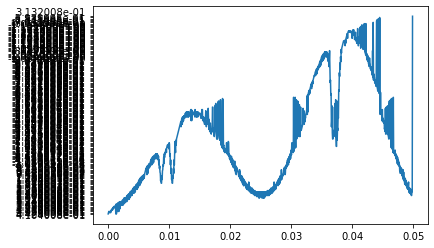

In [19]:
plt.plot(time,A)

In [21]:
data.replace("e", "E")

'#90000136064.428008E-01,4.104008E-01,4.428008E-01,3.996008E-01,3.996008E-01,4.428008E-01,4.428008E-01,3.996008E-01,3.996008E-01,4.428008E-01,4.320008E-01,3.996008E-01,4.320008E-01,3.888008E-01,3.888008E-01,4.320008E-01,4.212008E-01,3.888008E-01,4.212008E-01,3.780008E-01,4.212008E-01,3.780008E-01,3.780008E-01,4.212008E-01,4.212008E-01,3.672008E-01,4.104008E-01,3.564008E-01,4.104008E-01,3.564008E-01,3.564008E-01,3.996008E-01,3.996008E-01,3.456008E-01,3.996008E-01,3.456008E-01,3.996008E-01,3.456008E-01,3.348008E-01,3.888008E-01,3.780008E-01,3.348008E-01,3.672008E-01,3.348008E-01,3.348008E-01,3.672008E-01,3.672008E-01,3.240008E-01,3.240008E-01,3.672008E-01,3.564008E-01,3.132008E-01,3.564008E-01,3.024008E-01,3.456008E-01,3.024008E-01,3.456008E-01,3.024008E-01,3.348008E-01,3.024008E-01,3.348008E-01,2.916008E-01,3.348008E-01,2.808008E-01,3.240008E-01,2.808008E-01,3.132008E-01,2.700008E-01,3.132008E-01,2.700008E-01,3.132008E-01,2.592008E-01,3.024008E-01,2.484008E-01,2.916008E-01,2.484008E-01,

In [22]:
data_excel = data.split(",")

In [8]:
import pandas as pd

df = pd.DataFrame(data_string)
df.to_excel(excel_writer = "E:/LIAD_DATA_PON/test_absorbtion2.xlsx")

# ไอเดียคือทำทีละบรรทัดละค่อยๆ เช็คไป เปรียบเทียบกับการทำ arduino แล้วค่อยๆ แกะตามสำหรับทำ arbitrary waveform